# Logistic Regression - Hồi quy logic

# Import một số thư viện
## sklearn là thư viện Scikit Learn, chuyên cho Machine Learning

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [11]:
df = pd.read_csv('../data/framingham.csv')
# Xoá những dòng nào có ô không có giá trị (NA)
df = df.dropna()
# Thay na bằng 0
# df = df.fillna(0)

In [12]:
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3658 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3658 non-null   int64  
 1   age              3658 non-null   int64  
 2   education        3658 non-null   float64
 3   currentSmoker    3658 non-null   int64  
 4   cigsPerDay       3658 non-null   float64
 5   BPMeds           3658 non-null   float64
 6   prevalentStroke  3658 non-null   int64  
 7   prevalentHyp     3658 non-null   int64  
 8   diabetes         3658 non-null   int64  
 9   totChol          3658 non-null   float64
 10  sysBP            3658 non-null   float64
 11  diaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  heartRate        3658 non-null   float64
 14  glucose          3658 non-null   float64
 15  TenYearCHD       3658 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.8 KB


In [14]:
# import seaborn as sns
# sns.pairplot(df, hue = 'TenYearCHD')

In [15]:
X = np.asarray(df.drop(['TenYearCHD'],  axis=1))
X 

array([[  1.  ,  39.  ,   4.  , ...,  26.97,  80.  ,  77.  ],
       [  0.  ,  46.  ,   2.  , ...,  28.73,  95.  ,  76.  ],
       [  1.  ,  48.  ,   1.  , ...,  25.34,  75.  ,  70.  ],
       ...,
       [  0.  ,  52.  ,   2.  , ...,  21.47,  80.  , 107.  ],
       [  1.  ,  40.  ,   3.  , ...,  25.6 ,  67.  ,  72.  ],
       [  0.  ,  39.  ,   3.  , ...,  20.91,  85.  ,  80.  ]])

In [16]:
y = np.asarray(df['TenYearCHD']).reshape(-1,1)
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

## Chia tập huấn luyện, kiểm thử

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [19]:
classifier = LogisticRegression()

## Train

In [20]:
classifier.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
from sklearn.metrics import accuracy_score

## Kiểm tra lại với tập test

In [22]:
y_pred = classifier.predict(X_test)

In [25]:
y_pred_proba = classifier.predict_proba(X_test)
y_pred_proba

array([[0.67346883, 0.32653117],
       [0.85893334, 0.14106666],
       [0.87070272, 0.12929728],
       ...,
       [0.49504494, 0.50495506],
       [0.8717107 , 0.1282893 ],
       [0.96105581, 0.03894419]])

In [26]:
# Nếu muốn thay đổi ngưỡng
#y_pred = y_pred_proba[:,1] > 0.4

## Độ chính xác

In [27]:
accuracy_score(y_test, y_pred)

0.8415300546448088

## Ma trận nhầm lẫn

In [31]:
confusion_matrix(y_test, y_pred)

array([[610,   2],
       [114,   6]], dtype=int64)

In [34]:
from sklearn.metrics import auc, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1], pos_label=1)
auc(fpr, tpr)

0.699877450980392

Text(0, 0.5, 'True positive rate (Sensitivity)')

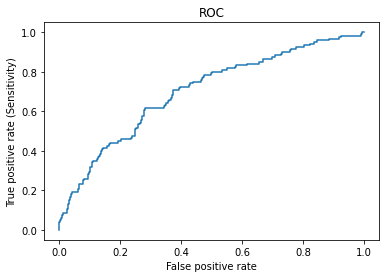

In [35]:
plt.plot(fpr, tpr)
plt.title('ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate (Sensitivity)')

In [23]:
from sklearn.metrics import log_loss
log_loss(y_test, y_pred_proba)

0.4236214308341005

# Bài tập tự luyện:
## Làm tương tự nhưng là với dataset diabetes2.csv
### Output là Outcome, input là các cột còn lại
### Làm tương tự như bài học